# Projet : Indice de masse corporel

## 1.Importation des packadges

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter("ignore")
from tabulate import tabulate

In [2]:
#Importation des données
df = pd.read_csv("weight-height-bmi.csv")
df.head()

,Gender,Height,Weight,BMI
0,Male,1.875714,109.720985,Obesity
1,Male,1.747060,73.622732,Normal
2,Male,1.882397,96.497550,Overweight
3,Male,1.821967,99.809504,Obesity
4,Male,1.774998,93.598619,Overweight


**Description des données**

- Gender qui représente le sexe des personnes
- Height qui représente la taille des personnes
- Weight qui représenet le poids des personnes
- BMI (Body Mass Index) qui représente l'indice de masse corporel avec les modalités suivantes: **Obésité**, **Normal**, **Surpoids** et **Souspoids**

**Problématique**

Effectuer des tests statistiques pour vérifier le lien entre les variables

In [3]:
#Informations sur le dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Gender  10000 non-null  object 
 1   Height  10000 non-null  float64
 2   Weight  10000 non-null  float64
 3   BMI     10000 non-null  object 
dtypes: float64(2), object(2)
memory usage: 312.6+ KB


In [4]:
#Vérifier les valeurs manquantes
df.isnull().sum()

Gender    0
Height    0
Weight    0
BMI       0
dtype: int64

In [5]:
#Vérifier les doublons
df.duplicated().sum()

0

### 1.1 Analyse globale sur les données

In [6]:
summary = df.describe().T
summary["IQR"] = summary["75%"] - summary["25%"] 
summary["etendue"] = summary["max"] - summary["min"]
summary["mediane"]= round(df.select_dtypes("number").median(),2)
summary["skew"]= round(df.select_dtypes("number").skew(),2)
summary["kurto"] = round(df.select_dtypes("number").kurtosis(),2)
summary["CV (%)"] = round(summary["std"]*100/summary["mean"],2)

In [7]:
print(tabulate(summary.T,headers=["Height","Weight"],tablefmt="fancy_grid",numalign="center"))

╒═════════╤═══════════╤══════════╕
│         │  Height   │  Weight  │
╞═════════╪═══════════╪══════════╡
│ count   │   10000   │  10000   │
├─────────┼───────────┼──────────┤
│ mean    │  1.68574  │ 73.2281  │
├─────────┼───────────┼──────────┤
│ std     │ 0.0977272 │ 14.5641  │
├─────────┼───────────┼──────────┤
│ min     │  1.37828  │ 29.3475  │
├─────────┼───────────┼──────────┤
│ 25%     │  1.61304  │  61.606  │
├─────────┼───────────┼──────────┤
│ 50%     │  1.68448  │ 73.1249  │
├─────────┼───────────┼──────────┤
│ 75%     │  1.75703  │ 84.8986  │
├─────────┼───────────┼──────────┤
│ max     │  2.00657  │ 122.465  │
├─────────┼───────────┼──────────┤
│ IQR     │ 0.143983  │ 23.2926  │
├─────────┼───────────┼──────────┤
│ etendue │ 0.628284  │ 93.1177  │
├─────────┼───────────┼──────────┤
│ mediane │   1.68    │  73.12   │
├─────────┼───────────┼──────────┤
│ skew    │   0.05    │   0.03   │
├─────────┼───────────┼──────────┤
│ kurto   │   -0.47   │  -0.79   │
├─────────┼─────────

**Interprétations**

  * la taille des personnes varie entre 1.37 et 2m
  * la taille moyenne est de 1.68m
  * la dispersion autour de la moyenne est de 5.8%
  * 50% des personnes ont une taille comprise entre 1.61 et 1.75m
  * 50% des personnes ont une taille inférieure à 1.68m
  
  
  
  * le poids des personnes varie entre 29.3 et 122kg
  * le poids moyen des personnes est de 73.22kg
  * la dispersion autour de la moyenne est de 19.89%
  * 50% des personnes ont un poids comprise entre 61.6 et 84.89kg
  * 50% des personnes ont un poids inférieur à 73.12kg
  

### 1.2 Distribution des varaiables

**Variables quantitatives**

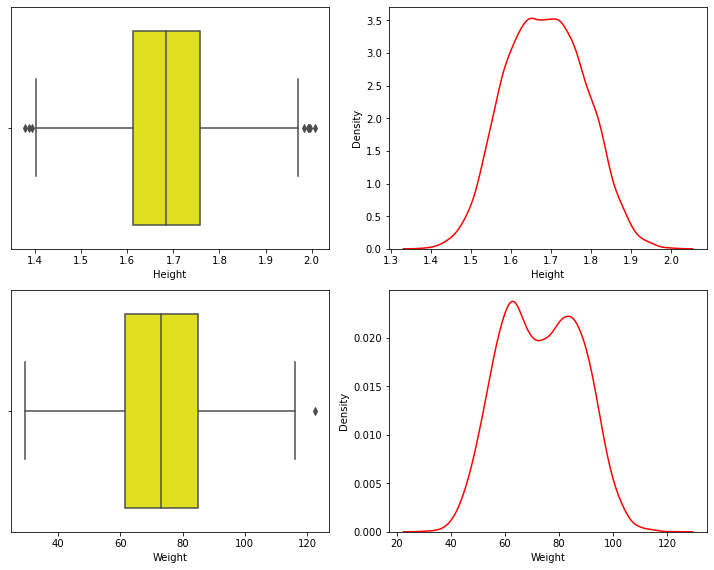

In [8]:
#Distribution des variables quantitatives
fig,ax = plt.subplots(2,2,figsize=(10,8))
for i, col in enumerate(df.select_dtypes("number").columns):
    sns.boxplot(data=df, x=col, ax=ax[i][0], color="yellow")
    sns.kdeplot(data=df, x=col, ax=ax[i][1], color="red")
fig.tight_layout(pad=1)    
plt.show()

**Variabales qualitatives**

In [9]:
def val_count(data,variable):
    effectif = data[variable].value_counts()
    pourcentage = data[variable].value_counts(normalize=True).round(4)*100
    resultat = pd.concat([effectif,pourcentage],axis=1,keys=["Effectifs","Pourcentage (%)"])
    print(tabulate(resultat,headers=["Effectifs","Pourcentage (%)"],tablefmt="fancy_grid",numalign="center"))

In [10]:
val_count(df,"Gender")

╒════════╤═════════════╤═══════════════════╕
│        │  Effectifs  │  Pourcentage (%)  │
╞════════╪═════════════╪═══════════════════╡
│ Male   │    5000     │        50         │
├────────┼─────────────┼───────────────────┤
│ Female │    5000     │        50         │
╘════════╧═════════════╧═══════════════════╛


In [11]:
val_count(df,"BMI")

╒═════════════╤═════════════╤═══════════════════╕
│             │  Effectifs  │  Pourcentage (%)  │
╞═════════════╪═════════════╪═══════════════════╡
│ Overweight  │    5589     │       55.89       │
├─────────────┼─────────────┼───────────────────┤
│ Normal      │    4114     │       41.14       │
├─────────────┼─────────────┼───────────────────┤
│ Obesity     │     255     │       2.55        │
├─────────────┼─────────────┼───────────────────┤
│ Underweight │     42      │       0.42        │
╘═════════════╧═════════════╧═══════════════════╛


In [12]:
#Définir une fonction pour représenter graphiquement les variables qualitatives
def graph(data,variable):
    plt.figure(figsize=(10,6),dpi=90)
    sns.countplot(data=data,x=variable,order=data[variable].value_counts(ascending=True).index,palette='hot')
    plt.title(f"Ditribution de la variable {variable}",fontweight="bold")
    plt.show()

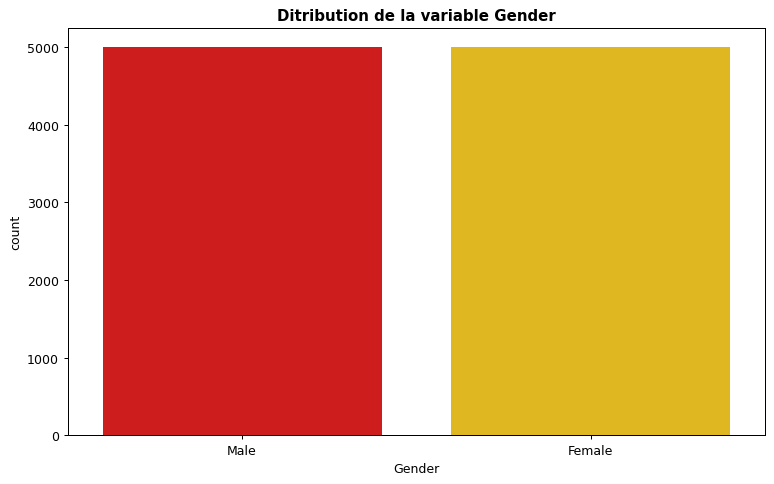

In [13]:
graph(df,"Gender")

On observe autant d'hommes que de femmes dans cette étude

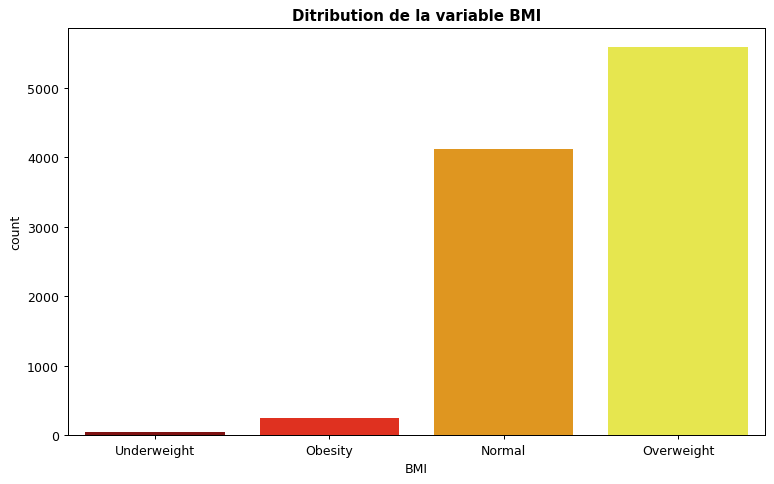

In [14]:
graph(df,"BMI")

Les personnes en surpoids sont plus nombreux elles représentent 55.89%. Ensuite viennent les personnes de poids normal 41.14%. On a 2.55% d'obésité et les personnes en souspoids représentent 0.42%

### 1.3 Détection des Outliers

In [15]:
#Définir une fonction pour détecter les outliers
def outliers(data,variable):
    q1,q3 = np.percentile(data[variable],[25,75])
    IQR = q3 - q1
    lower = q1 - 1.5*IQR
    hupper = q3 + 1.5*IQR
    return(data[(data[variable]<lower) | (data[variable]>hupper)])

In [16]:
outliers_height = outliers(df,"Height")
outliers_height

,Gender,Height,Weight,BMI
994,Male,1.983635,115.979317,Overweight
1317,Male,1.992936,103.120769,Overweight
2014,Male,2.006568,122.465167,Obesity
3285,Male,1.994617,115.162021,Overweight
3757,Male,1.996983,111.462878,Overweight
6624,Female,1.387268,32.383633,Underweight
7294,Female,1.393793,35.655357,Underweight
9285,Female,1.378284,29.347460,Underweight


In [17]:
outliers_weight = outliers(df,"Weight")
outliers_weight

,Gender,Height,Weight,BMI
2014,Male,2.006568,122.465167,Obesity


In [18]:
#Copie du dataframe pour traiter graphiquement les outliers
df_outliers = df.copy()
#Créer une colonne outliers et la remplir par False(i.e ce n'est pas un outlier)
df_outliers["Outliers"]="False"

In [19]:
#Créer une fonction pour représenter graphiquement les outliers
def graph_outliers(data,index):
    ##On implemente les ligne False par True si c'est avéré que c'est un outlier##
    plt.figure(figsize=(10,6),dpi=90)
    data.iloc[index,-1] = "True"
    sns.scatterplot(data=data, x="Weight", y="Height",hue="Outliers")
    plt.title("Relation entre La taille et le poids avec outliers",fontweight="bold")
    plt.xlabel("Poids",fontweight="bold")
    plt.ylabel("Taille",fontweight="bold")
    plt.show()

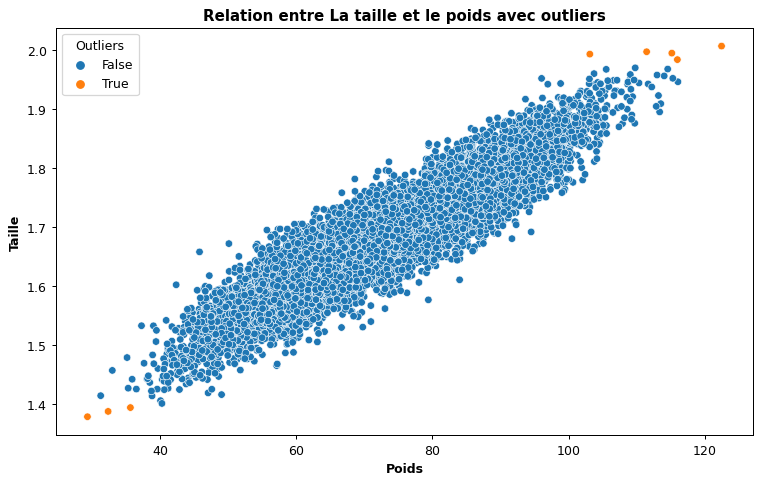

In [20]:
graph_outliers(df_outliers,outliers_height.index)

## 2. Relations entre les variables

**Entre variables quantitatives**

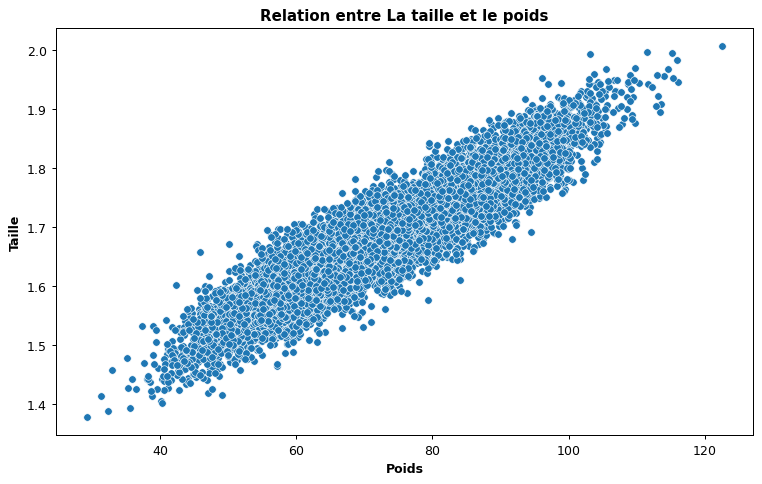

In [21]:
plt.figure(figsize=(10,6),dpi=90)
sns.scatterplot(data=df, x="Weight", y="Height")
plt.title("Relation entre La taille et le poids",fontweight="bold")
plt.xlabel("Poids",fontweight="bold")
plt.ylabel("Taille",fontweight="bold")
plt.show()

**Entre variables qualitatives**

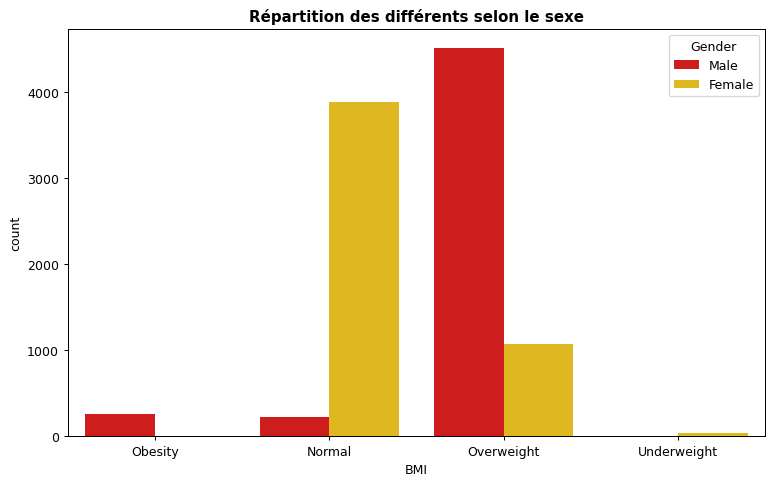

In [22]:
plt.figure(figsize=(10,6),dpi=90)
sns.countplot(data=df, x="BMI", hue="Gender",palette='hot')
plt.title("Répartition des différents selon le sexe",fontweight="bold")
plt.show()

**Entre variable quantitaive et variable qualitative**

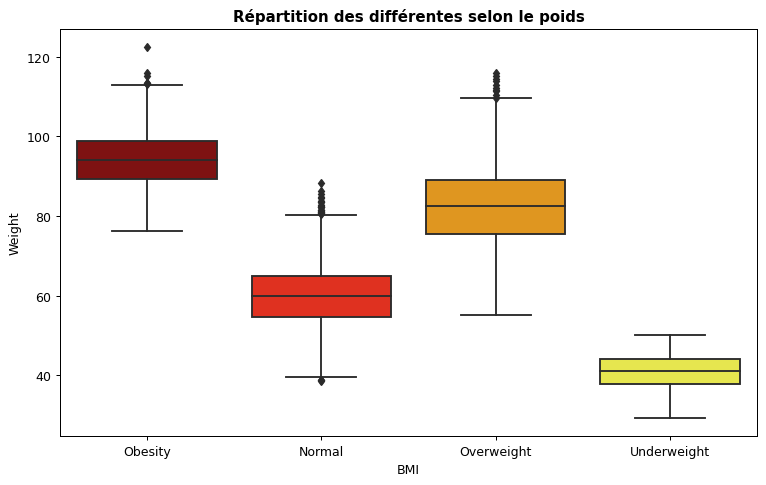

In [23]:
plt.figure(figsize=(10,6),dpi=90)
sns.boxplot(data=df, y="Weight", x="BMI",palette='hot')
plt.title("Répartition des différentes selon le poids",fontweight="bold")
plt.show()

## 3. Tests statistiques entre variables

### 3.1 Entre variables quantitatives (Taille et Poids)

In [24]:
from scipy.stats import pearsonr

r,p = pearsonr(df["Height"],df["Weight"])

print("La p_values est de",p)
if p <0.05:
    print("On rejette l'hypothèse nulle, il y a une corrélation entre le poids et la taille ")
else:
    print("On accepte l'hypothèse nulle, il n'y a pas de corrélations entres le poids et taille")

La p_values est de 0.0
On rejette l'hypothèse nulle, il y a une corrélation entre le poids et la taille 


### 3.2 Entre deux variables qualitatives (Sexe et BMI)

In [25]:
table_contingence = pd.crosstab(df["BMI"],df["Gender"])
table_contingence

Gender,Female,Male
BMI,,
Normal,3887,227
Obesity,0,255
Overweight,1071,4518
Underweight,42,0


In [26]:
from scipy.stats import chi2_contingency

khi2_obs,p,ddl,effectifs_théorique = chi2_contingency(table_contingence)


print("La p_values est de",p)
if p <0.05:
    print("On rejette l'hypothèse nulle, il y a un lien entre le sexe le BMI")
else:
    print("On accepte l'hypothèse nulle, il n'y a pas de lien entres le sexe et le BMI")

La p_values est de 0.0
On rejette l'hypothèse nulle, il y a un lien entre le sexe le BMI


In [27]:
# Intensité de la liaison entre le sexe et le BMI
l = len(df.BMI.unique())
c = len(df.Gender.unique())
N = df.shape[0]
mini = min(l-1,c-1)
#Calcul du V de Cramer
V = np.sqrt(khi2_obs/N*mini)
#Calcul du T de Tschuprow
T=np.sqrt(khi2_obs/N*(l-1)*(c-1))

print(f"Le V de Cramer est de {V}")
print(f"Le T de Tschuprow est de {T}")

Le V de Cramer est de 0.7535933024095349
Le T de Tschuprow est de 1.305261888016932


### 3.3 Entre une variable quantitative et une variable qualitative (Poids et BMI)

In [28]:
df2 = df.copy()
df2 = df2[["Weight","BMI"]]

In [29]:
groupe = df2["BMI"].unique()
groupe

array(['Obesity', 'Normal', 'Overweight', 'Underweight'], dtype=object)

In [30]:
df2.groupby("BMI")["Weight"].mean()

BMI
Normal         59.950566
Obesity        94.475997
Overweight     82.276969
Underweight    40.632229
Name: Weight, dtype: float64

In [31]:
df_anova = {categorie:df2["Weight"][df2["BMI"]==categorie] for categorie in groupe}

In [32]:
from scipy.stats import f_oneway

f,p = f_oneway(df_anova["Obesity"],df_anova["Normal"],df_anova["Overweight"],df_anova["Underweight"])

print("La p_values est de",p)
if p <0.05:
    print("On rejette l'hypothèse nulle, le poids moyen diffère pour au moins un groupe BMI")
else:
    print("On accepte l'hypothèse nulle, il n'y a pas de différence de poids moyen entre les groupes BMI")

La p_values est de 0.0
On rejette l'hypothèse nulle, le poids moyen diffère pour au moins un groupe BMI


**Vérification des hypothèses pour valider le test**

Il faudra vérifier la **normalité** de la variable quantitative et **l'égalité** de la variance entre les groupes avant de valider le test d'**ANOVA**

In [33]:
from scipy.stats import shapiro

stat,p = shapiro(df["Weight"])

print("La p_values est de",p)
if p <0.05:
    print("On rejette l'hypothèse nulle, la variable ne suit pas une distribution normale")
else:
    print("On accepte l'hypothèse nulle, la variable suit une distribution normale")

La p_values est de 5.5355567467227875e-30
On rejette l'hypothèse nulle, la variable ne suit pas une distribution normale


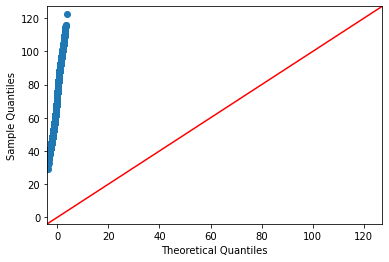

In [34]:
import statsmodels.api as sm

sm.qqplot(df["Weight"], line='45')
plt.show()

In [35]:
from scipy.stats import levene

f,p = levene(df_anova["Obesity"],df_anova["Normal"],df_anova["Overweight"],df_anova["Underweight"])

print("La p_values est de",p)
if p <0.05:
    print("On rejette l'hypothèse nulle, il n'y a pas une homogénéité entre les groupes")
else:
    print("On accepte l'hypothèse nulle, il y a une homogénéité des variances entre les groupes")

La p_values est de 1.3962112202221735e-62
On rejette l'hypothèse nulle, il n'y a pas une homogénéité entre les groupes


**Conclusiosn :** La normalité et l'égalité des varaiances ne sont pas vérifées donc on peut pas valider le test de ANOVA. Par conséquent un va utiliser un test non paramétrique

In [36]:
from scipy.stats import kruskal

f,p = kruskal(df_anova["Obesity"],df_anova["Normal"],df_anova["Overweight"],df_anova["Underweight"])

print("La p_values est de",p)
if p <0.05:
    print("On rejette l'hypothèse nulle, le poids médian diffère pour au moins un groupe BMI")
else:
    print("On accepte l'hypothèse nulle, il n'y a pas de différence de poids médian entre les groupes BMI")

La p_values est de 0.0
On rejette l'hypothèse nulle, le poids médian diffère pour au moins un groupe BMI
